<a href="https://colab.research.google.com/github/justingardner/tutorials/blob/master/psychometric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Could  have an example data set and ask which law applies
Could have them take a Fechner curve and plot is as a power-law

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Fechner's law 

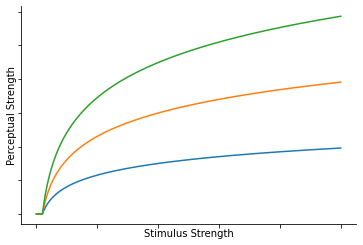

In [ ]:
# parameters
sthresh = .2
k = [0.5,1,1.5]

# stimulus strengths to plot for
s = np.linspace(0.001,10,1000)

# compute fechner's law
psi1 = k[0]*(np.log(s/sthresh))
psi1[s<sthresh] = 0
psi2 = k[1]*(np.log(s/sthresh))
psi2[s<sthresh] = 0
psi3 = k[2]*(np.log(s/sthresh))
psi3[s<sthresh] = 0

# make plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot functions
plt.plot(s,psi1)
plt.plot(s,psi2)
plt.plot(s,psi3)

ax.set_xlabel('Stimulus Strength')
ax.set_ylabel('Perceptual Strength')
ax.tick_params(direction='out',labelbottom=False,labelleft=False)
#ax.set_xlim(np.min(s)-0.1,np.max(s))
#ax.set_xlim(0,25)
#ax.set_xbound(0,25)
#print(pos2)
#ax.set_ylim(np.min(psi)-0.5,np.max(psi))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_xscale("log")

plt.savefig('fechner.pdf')

Steven's lab

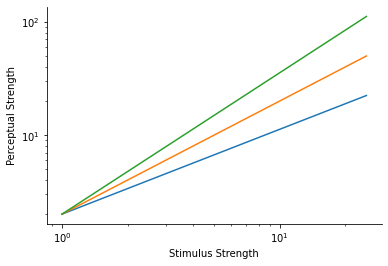

In [ ]:
# parameters
#sthresh = 3
sthresh = 0
k = [2,2,2]
n = [0.75,1,1.25]
#n = [0.5,0.75,0.75]
#n = [0.75,1,1.1]
# stimulus strengths to plot for
s = np.linspace(1,25,100)

# compute fechner's law
#psi0 = 0.1*(np.log(s/sthresh))
#psi0[s<sthresh] = 0
# compute steven's law
psi1 = k[0]*np.power(s-sthresh,n[0])
psi1[s<sthresh] = 0
psi2 = k[1]*np.power(s-sthresh,n[1])
psi2[s<sthresh] = 0
psi3 = k[2]*np.power(s-sthresh,n[2])
psi3[s<sthresh] = 0

# make plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot functions
#plt.plot(s,psi0)
plt.plot(s,psi1)
plt.plot(s,psi2)
plt.plot(s,psi3)

ax.set_xlabel('Stimulus Strength')
ax.set_ylabel('Perceptual Strength')
#ax.tick_params(direction='out',labelbottom=False,labelleft=False)
#ax.set_xlim(np.min(s)-0.1,np.max(s))
#ax.set_xlim(0,25)
#ax.set_xbound(0,25)
#print(pos2)
#ax.set_ylim(np.min(psi)-0.5,np.max(psi))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xscale("log")
ax.set_yscale("log")
plt.savefig('stevens.pdf')

Weber's law

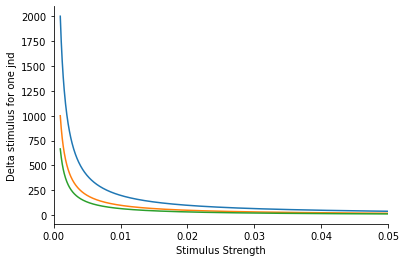

In [ ]:
# parameters
sthresh = 3
k = [0.5,1,1.5]

s = np.linspace(0.001,0.05,1000)
# compute weber's law
ds1 = k[0]*s
ds2 = k[1]*s
ds3 = k[2]*s

# make plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot functions
#plt.plot(s,psi0)
#plt.plot(s,ds1)
#plt.plot(s,ds2)
#plt.plot(s,ds3)
plt.plot(s,1/ds1)
plt.plot(s,1/ds2)
plt.plot(s,1/ds3)

ax.set_xlabel('Stimulus Strength')
ax.set_ylabel('Delta stimulus for one jnd')
#ax.tick_params(direction='out',labelbottom=False,labelleft=False)
#ax.set_xlim(np.min(s)-0.1,np.max(s))
ax.set_xlim(0,0.05)
#ax.set_xbound(0,25)
#print(pos2)
#ax.set_ylim(np.min(psi)-0.5,np.max(psi))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_xscale("log")
#ax.set_yscale("log")
plt.savefig('weber.pdf')

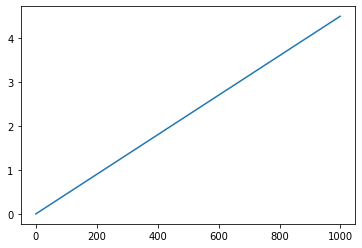

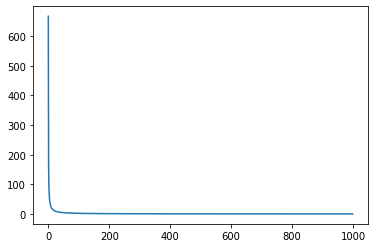

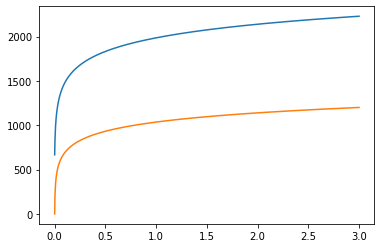

In [ ]:
# parameters
sthresh = 0.001
k = [1.5]

# stimulus strengths to plot for
s = np.linspace(0.001,3,1000)

# compute weber's law
ds1 = k[0]*s

plt.figure()
plt.plot(ds1)

plt.figure()
plt.plot(1/ds1)
# compute fechner's law
psi = k[0]*(np.log(s/sthresh))
psi[s<sthresh] = 0


# integrate weber's lab
integrateWeber = np.cumsum(1/ds1)

plt.figure()
plt.plot(s,integrateWeber)
plt.figure
plt.plot(s,100*psi)

# plot derivative
#plt.figure()
#plt.plot(1/np.diff(psi))

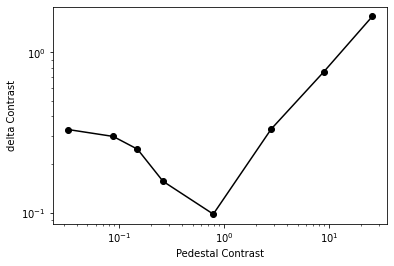

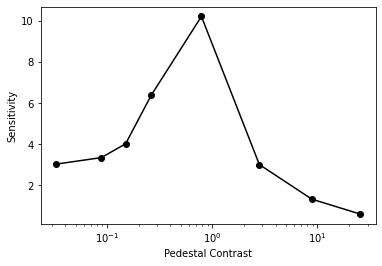

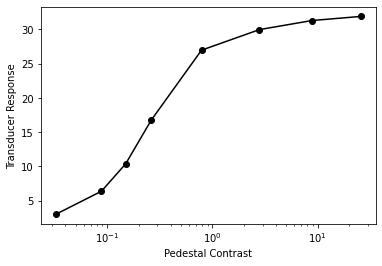

In [ ]:
# data thiefed from Nachmais(1981)
contrast = [0.03262461140615300,0.08803203752373330,0.14979612843646600,0.26190210380940400,0.7876778725988400,2.802756668743720,8.85108408255861,25.62808387265430]
deltaContrast = np.array([0.3303779637359150,0.29907501132113000,0.24896837110089700,0.15700614362627300,0.09798023790343650,0.3326861622309250,0.7559803432610200,1.676324364534920])

# compute sensitivity as 1/deltaContrast
sensitivity = 1/deltaContrast

# compute the transducer function as a cumulative sum (i.e. integrate) of the sensitivity function
transducer = np.cumsum(sensitivity)

# plot the "threshold vs contrast" curve
plt.loglog(contrast,deltaContrast,'ko-')
plt.xlabel('Pedestal Contrast')
plt.ylabel('delta Contrast')
plt.savefig('nachmias.pdf')

# plot sensitivity curve
plt.figure()
plt.semilogx(contrast,1/np.array(deltaContrast),'ko-')
plt.xlabel('Pedestal Contrast')
plt.ylabel('Sensitivity')
plt.savefig('nachmias_sensitivity.pdf')

# plot implied transducer function
plt.figure()
plt.semilogx(contrast,transducer,'ko-')
#plt.semilogx(huh,transducer)
plt.xlabel('Pedestal Contrast')
plt.ylabel('Transducer Response')
plt.savefig('transducer.pdf')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


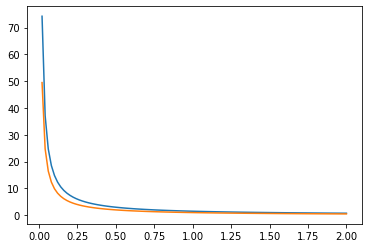

In [ ]:
s = np.linspace(0,2,100)

k = 1.5
plt.plot(s,k/s)

k = 1
plt.plot(s,k/s)


In [1]:
# function to make a mesh of x,y points
def getMeshPoints(nPoints):

  # first create a linearly spaced set of x and y points between -1 and 1
  x = np.linspace(-1,1,nPoints)
  y = np.linspace(-1,1,nPoints)

  # keep the extents for use with imshow
  extents = [np.min(x),np.max(x),np.min(y),np.max(y)]

  # now create the mesh of x and y (these will now both be 2D matrices of x and y values)
  x, y = np.meshgrid(x, y, indexing='xy')

  # and return the computed values
  return x, y, extents

# function that makes a gaussian
def makeGaussian(x,y,sigma):
  # there it is!
  gaussian = np.exp(-(x**2+y**2)/(2*sigma**2))
  
  # return 
  return gaussian

# function to make a grating
def makeGrating(x, y, orientation, spatialPhase, spatialFrequency):
  # we wil convert orientation and spatialPhase into radians
  orientation = np.pi*orientation/180
  spatialPhase = np.pi*spatialPhase/180

  # we need to convert spatial frequency into cycles/image
  # remember that we made the extents in getMeshPoints
  # to go from -1 to 1, so we want that to go from -pi to pi
  spatialFrequency = spatialFrequency * np.pi

  # make the grating
  grating = np.cos(spatialFrequency*(x*np.cos(orientation)+y*np.sin(orientation))+spatialPhase)

  # and return
  return grating

class simpleCell:
  def __init__(self,meshsize, orientationPreference, spatialPhase, spatialFrequencyPreference, exponent):
    # keep the meshsize
    self.meshsize = meshsize
    
    # first make a mesh of x,y points
    self.x, self.y, self.extents = getMeshPoints(meshsize)

    # compute the grating needed
    grating = makeGrating(self.x, self.y, orientationPreference, spatialPhase, spatialFrequencyPreference)

    # compute the gaussian (we fix the size here, but of course that could be a passed
    # in parameter)
    gaussian = makeGaussian(self.x, self.y, 0.2)

    # now we can make the gabor receptive field
    self.linearRF = grating * gaussian

    # the exponent is just something we store
    self.exponent = exponent

#function to compute the simple cell response
def computeSimpleCellResponse(simpleCell, stimulus):
  # well, the first step is to apply the linear receptive field
  # which means to take the dot product of the linear receptive field
  # and the stimulus. Note, I don't understand what numpy's dot product
  # does in 2D - so maybe there is a better way to write this. Instead
  # I'm going to go really basic here. Take the element-wise multiplication
  # of stimulus and RF and then add that all up together
  response = simpleCell.linearRF * stimulus
  response = np.sum(response)

  # since the units of the output are aribtrary, let's
  # make them a bit more intepretable where 1 would be the
  # maximum possible reponse of the RF with it's most preferred
  # stimulus. What is the most preferred stimulus, well the one
  # that exactly matches the RF!
  maxResponse = simpleCell.linearRF * simpleCell.linearRF
  maxResponse = np.sum(maxResponse)

  # now normalize by this maximum response
  response = response / maxResponse

  # now we apply a threshold
  if response<0:
    response = 0
  
  # and apply the static non-linearity
  response = response**simpleCell.exponent
  
  # and return, couldn't be simpler, no pun intended. really.
  return response

# class for a complex cell
class complexCell:
  def __init__(self, meshsize, orientationPreference, spatialFrequencyPreference):
    # keep the meshsize
    self.meshsize = meshsize
    
    # first make a mesh of x,y points
    self.x, self.y, self.extents = getMeshPoints(meshsize)

    # create the four simple cells that are needed 
    self.s000 = simpleCell(meshsize,orientationPreference,0,spatialFrequencyPreference,2)
    self.s090 = simpleCell(meshsize,orientationPreference,90,spatialFrequencyPreference,2)
    self.s180 = simpleCell(meshsize,orientationPreference,180,spatialFrequencyPreference,2)
    self.s270 = simpleCell(meshsize,orientationPreference,180,spatialFrequencyPreference,2)

# and a function that can be used to compute the response of a complex cell
def computeComplexCellResponse(complexCell, stimulus):
  # compute the response to each sub-field
  r000 = computeSimpleCellResponse(complexCell.s000, stimulus)
  r090 = computeSimpleCellResponse(complexCell.s090, stimulus)
  r180 = computeSimpleCellResponse(complexCell.s180, stimulus)
  r270 = computeSimpleCellResponse(complexCell.s270, stimulus)

  # sum together and normalize so that the maximum response is 1
  r = (r000+r090+r180+r270)/4

  # add that all together and return
  return r


In [16]:
# class for a simple cell with normalization
class simpleCellWithNormalization:
  def __init__(self, meshsize, orientationPreference, spatialFrequencyPreference):
    # keep the meshsize
    self.meshsize = meshsize
    
    # first make a mesh of x,y points
    self.x, self.y, self.extents = getMeshPoints(meshsize)

    # create the simple cell receptive field - note that we are leaving out the exponent
    # because we are going to compute that ourselves
    self.rf = simpleCell(meshsize,orientationPreference,0,spatialFrequencyPreference,1)

    # now create simple cells for the normalization pool
    self.nNormPool = 12
    self.normPool = []
    for i in range(0,self.nNormPool):
      # get an orientation preference
      normOrientationPreference = i*360/self.nNormPool
      # create the appropriate simple cell
      self.normPool.append(simpleCell(meshsize,normOrientationPreference,0,spatialFrequencyPreference,2))

    # set c50 and exponent
    self.c50 = 0.5
    self.exponent = 2


In [38]:
def computeSimpleCellWithNormalizationResponse(s, stimulus):
  # compute response to central receptive field
  rfResponse = computeSimpleCellResponse(s.rf, stimulus)
  # compute normalization pool response
  normPoolResponse = []
  for i in range(0,s.nNormPool):
    normPoolResponse.append(computeSimpleCellResponse(s.normPool[i],stimulus))

  # sum the norm pool
  normPoolResponse = np.sum(normPoolResponse)

  # here, just trying to set the range of the norm pool, we want it to have a 
  # maximum resonse of 1, so to do that, we use the same trick we have done
  # with a simple cell. We compute the best possible stimulus for one of the
  # filters (it's matched stimulus) and then hit all the other receptive fields
  # with the same stimulus and see what the summed response is. This summed
  # value should be the highest possible response you can get with the norm
  # pool
  maxResponse = []
  for i in range(0,s.nNormPool):
    maxResponse.append(computeSimpleCellResponse(s.normPool[i],s.normPool[0].linearRF))
  maxResponse = np.sum(maxResponse)
  normPoolResponse = normPoolResponse / (2*maxResponse)

  # compute normalized response
  response = rfResponse**s.exponent/(s.c50**s.exponent + normPoolResponse**s.exponent)

  # return response
  return response

Text(0, 0.5, 'Response')

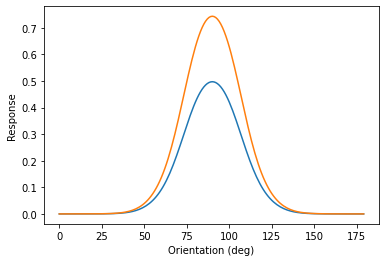

In [29]:
meshsize = 32
sfPref = 4
# make a simple with normalization
s = simpleCellWithNormalization(meshsize,90,sfPref)
# make stimulus
stimulus = makeGrating(s.x,s.y,0,0,sfPref)
# compute response
response = computeSimpleCellWithNormalizationResponse(s, stimulus)

# init response array
r = []
r2 = []

# loop over orientations
orientations = range(0,180,1)
for orientation in orientations:
  # make a grating of the appropraite orientation
  stimulus = makeGrating(s.x, s.y, orientation, 0, sfPref)

  # compute complex cell response
  r.append(computeSimpleCellWithNormalizationResponse(s, stimulus))

  # compute complex cell response
  r2.append(computeSimpleCellWithNormalizationResponse(s, 0.8*stimulus))

# convert to array
r = np.array(r)

# plot
plt.plot(orientations,r)
plt.plot(orientations,r2)
plt.xlabel('Orientation (deg)')
plt.ylabel('Response')

Text(0, 0.5, 'Response')

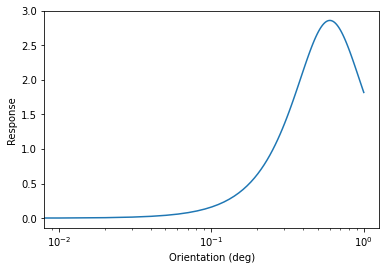

In [39]:
meshsize = 32
sfPref = 4
orientPref = 90
# make a simple with normalization
s = simpleCellWithNormalization(meshsize,orientPref,sfPref)

# init response array
r = []

# loop over orientations
nContrasts = 100
contrasts = np.linspace(0,1,nContrasts)
for iContrast in range(0,nContrasts):
  # make a grating of the appropraite orientation
  stimulus = makeGrating(s.x, s.y, orientPref, 0, sfPref)

  # compute complex cell response
  r.append(computeSimpleCellWithNormalizationResponse(s, contrasts[iContrast]*stimulus))

# convert to array
r = np.array(r)

# plot
plt.semilogx(contrasts,r)
plt.xlabel('Orientation (deg)')
plt.ylabel('Response')